In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data = pd.read_csv('/kaggle/input/airline-delay-cause-dataset/Airline_Delay_Cause.csv')

In [3]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [5]:
data = data.drop(['carrier','carrier_name','airport','airport_name'],axis=1)
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317268 entries, 0 to 318016
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317268 non-null  int64  
 1   month                317268 non-null  int64  
 2   arr_flights          317268 non-null  float64
 3   arr_del15            317268 non-null  float64
 4   carrier_ct           317268 non-null  float64
 5   weather_ct           317268 non-null  float64
 6   nas_ct               317268 non-null  float64
 7   security_ct          317268 non-null  float64
 8   late_aircraft_ct     317268 non-null  float64
 9   arr_cancelled        317268 non-null  float64
 10  arr_diverted         317268 non-null  float64
 11  arr_delay            317268 non-null  float64
 12  carrier_delay        317268 non-null  float64
 13  weather_delay        317268 non-null  float64
 14  nas_delay            317268 non-null  float64
 15  security_delay       3

In [8]:
data['weather_delay'].min(),data['weather_delay'].max()

(0.0, 57707.0)

In [9]:
data['WDCase'] = data['weather_delay'].apply(lambda x : 1 if x >100 else 0)

In [10]:
data['WDCase'].value_counts()

WDCase
0    215116
1    102152
Name: count, dtype: int64

In [11]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,1
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,1
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [12]:
X = data.drop(['WDCase'],axis = 1)
y =data['WDCase']

In [13]:
X

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [14]:
y

0         0
1         0
2         0
3         0
4         0
         ..
318012    1
318013    1
318014    0
318015    0
318016    1
Name: WDCase, Length: 317268, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (237951, 17)
X_test shape is  (79317, 17)
y_train shape is  (237951,)
y_test shape is  (79317,)


In [16]:
import tensorflow as tf
import keras

In [34]:
KerasModel = keras.models.Sequential([
            # keras.layers.Input(shape=(17)),
            keras.layers.Dense(8,  activation = 'tanh'),
            # keras.layers.Dropout(0.1),
            keras.layers.Dense(128, activation = 'tanh'),
            
            # keras.layers.Dropout(0.3),
            keras.layers.Dense(64, activation = 'tanh'),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(1, activation = 'sigmoid'),
            ])

In [35]:
# MyOptimizer = tf.keras.optimizers.experimental.AdamW(
#     learning_rate=0.001,
#     weight_decay=0.004,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-07,
#     amsgrad=False,
#     clipnorm=None,
#     clipvalue=None,
#     global_clipnorm=None,
#     use_ema=False,
#     ema_momentum=0.99,
#     ema_overwrite_frequency=None,
#     jit_compile=True,
#     name="AdamW")


KerasModel.compile( optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# regression : mse , mse
# BC : binary_crossentropy , accuracy
# MC : categorical_crossentropy , accuracy

In [36]:
history = KerasModel.fit(X_train,y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7321 - loss: 0.5472 - val_accuracy: 0.7863 - val_loss: 0.4597
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7964 - loss: 0.4577 - val_accuracy: 0.8042 - val_loss: 0.4494
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8055 - loss: 0.4481 - val_accuracy: 0.8114 - val_loss: 0.4386
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8137 - loss: 0.4348 - val_accuracy: 0.8262 - val_loss: 0.4223
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8305 - loss: 0.4190 - val_accuracy: 0.8349 - val_loss: 0.4103
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8358 - loss: 0.4086 - val_accuracy: 0.8393 - val_loss: 0.3989
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8433 - loss: 0.3929 - val_accuracy: 0.8467 - val_loss: 0.3793
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8496 - loss: 0.3735 - val_accuracy: 0.

In [37]:
print(KerasModel.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 8)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,853 (112.71 KB)

 Trainable params: 9,617 (37.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,236 (75.14 KB)

None


In [41]:
KerasModel.save('/kaggle/working/KerasModel.keras')

In [42]:
NewKerasModel = keras.models.load_model('/kaggle/working/KerasModel.keras')

In [43]:
%%time
for i in range(1000000) : 
  i+=1

CPU times: user 135 ms, sys: 878 µs, total: 136 ms
Wall time: 133 ms


In [44]:
X_test

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
256596,2007,1,213.0,64.0,16.33,3.44,15.06,0.00,29.17,13.0,0.0,3840.0,912.0,292.0,720.0,0.0,1916.0
6930,2022,1,617.0,82.0,29.69,2.04,26.88,0.30,23.08,27.0,1.0,5410.0,2471.0,157.0,1095.0,15.0,1672.0
125951,2014,11,62.0,8.0,3.00,0.00,2.09,0.00,2.91,0.0,0.0,609.0,391.0,0.0,123.0,0.0,95.0
87817,2017,10,82.0,9.0,6.00,1.20,1.00,0.00,0.80,0.0,0.0,260.0,201.0,22.0,17.0,0.0,20.0
42037,2020,3,168.0,12.0,6.65,2.00,1.04,0.00,2.31,19.0,0.0,558.0,331.0,73.0,43.0,0.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132929,2014,5,2410.0,637.0,222.01,9.35,56.16,0.85,348.62,13.0,0.0,34346.0,9518.0,842.0,2427.0,38.0,21521.0
251541,2007,4,42.0,8.0,5.83,0.00,1.50,0.00,0.67,1.0,0.0,306.0,234.0,0.0,58.0,0.0,14.0
84057,2018,1,80.0,12.0,3.48,3.92,0.12,0.00,4.48,2.0,0.0,1060.0,97.0,721.0,13.0,0.0,229.0
32889,2020,10,356.0,23.0,8.12,0.00,10.33,0.00,4.56,0.0,2.0,989.0,516.0,0.0,260.0,0.0,213.0


In [45]:
y_pred = NewKerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))
print('Prediction items are {}'.format(y_pred[:5]))

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Prediction Shape is (79317, 1)
Prediction items are [[9.9947315e-01]
 [9.9947315e-01]
 [2.6626763e-04]
 [1.2601881e-04]
 [1.2631090e-04]]


In [46]:
ModelLoss, ModelAccuracy = NewKerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9996 - loss: 0.0023
Model Loss is 0.002436029491946101
Model Accuracy is 0.9995587468147278


In [47]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [48]:
history.history['accuracy']

[0.7656492590904236,
 0.7991141080856323,
 0.8063340783119202,
 0.8180171251296997,
 0.8318519592285156,
 0.8369033932685852,
 0.8445016145706177,
 0.8499522805213928,
 0.8544195890426636,
 0.8719022274017334,
 0.8908851146697998,
 0.9226983785629272,
 0.9514647722244263,
 0.9618114829063416,
 0.9710654616355896,
 0.9804161190986633,
 0.985375165939331,
 0.9844085574150085,
 0.9907207489013672,
 0.9888842701911926,
 0.9911872744560242,
 0.9925699234008789,
 0.9937928318977356,
 0.9942467212677002,
 0.9943391680717468,
 0.9946039319038391,
 0.994961142539978,
 0.9944106340408325,
 0.994805634021759,
 0.9940366148948669,
 0.9917882084846497,
 0.9951208233833313,
 0.9959949851036072,
 0.9961925148963928,
 0.9959655404090881,
 0.996398389339447,
 0.9955831170082092,
 0.9956545829772949,
 0.9964362382888794,
 0.9965749382972717,
 0.996658980846405,
 0.9961210489273071,
 0.9961252808570862,
 0.9961966872215271,
 0.9961714744567871,
 0.9965245127677917,
 0.9955032467842102,
 0.996738851070404

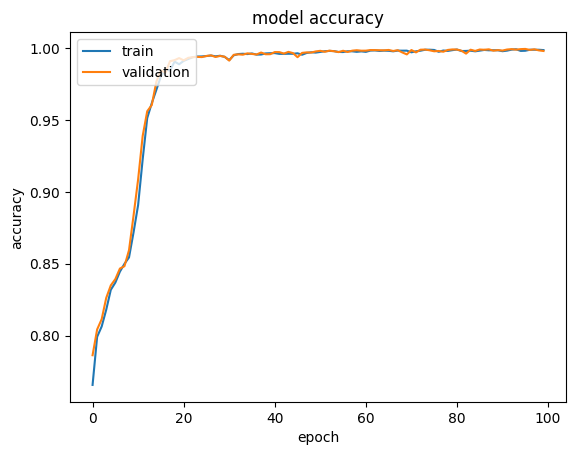

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [50]:
history.history['loss']

[0.5022902488708496,
 0.45535582304000854,
 0.44473257660865784,
 0.4317130148410797,
 0.4173182547092438,
 0.4052082896232605,
 0.3910079896450043,
 0.36836254596710205,
 0.34315913915634155,
 0.3044555187225342,
 0.24981436133384705,
 0.189396470785141,
 0.13456270098686218,
 0.10671446472406387,
 0.0873398557305336,
 0.06728298962116241,
 0.05970802158117294,
 0.06132262572646141,
 0.04157658666372299,
 0.04768763855099678,
 0.04031151533126831,
 0.035733405500650406,
 0.029931405559182167,
 0.028348563238978386,
 0.0279034785926342,
 0.026152223348617554,
 0.025207512080669403,
 0.027529055252671242,
 0.025641094893217087,
 0.029683280736207962,
 0.038945600390434265,
 0.024541256949305534,
 0.020003069192171097,
 0.01941441185772419,
 0.020165229216217995,
 0.01810607686638832,
 0.022662706673145294,
 0.021763240918517113,
 0.017951002344489098,
 0.01691010408103466,
 0.016970334574580193,
 0.01953057572245598,
 0.019826136529445648,
 0.018757563084363937,
 0.01871679350733757,
 0

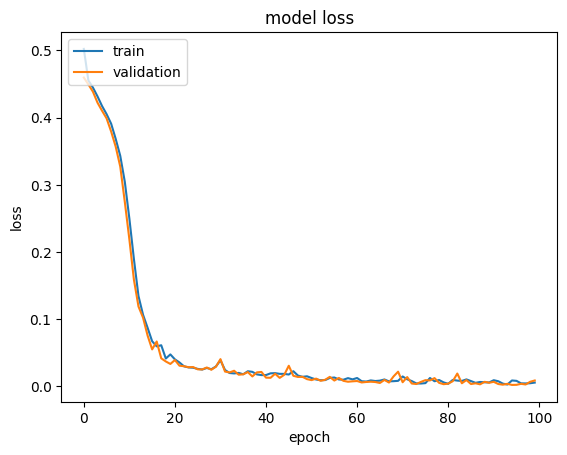

In [51]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [52]:
len(y_test), len(y_pred)

(79317, 79317)

In [53]:
y_pred

array([[9.9947315e-01],
       [9.9947315e-01],
       [2.6626763e-04],
       ...,
       [9.9910092e-01],
       [2.6626763e-04],
       [1.0990036e-02]], dtype=float32)

In [54]:
y_pred = [np.round(i[0]) for i in y_pred]
y_pred

[1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[53701    23]
 [   12 25581]]


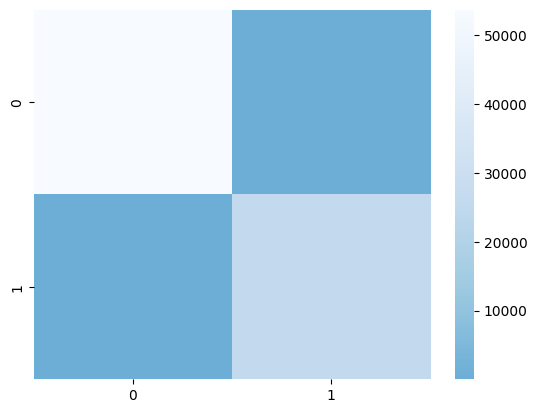

In [56]:
# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()

In [57]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53724
           1       1.00      1.00      1.00     25593

    accuracy                           1.00     79317
   macro avg       1.00      1.00      1.00     79317
weighted avg       1.00      1.00      1.00     79317



In [58]:
data['weather_delay'].min(),data['weather_delay'].max()

(0.0, 57707.0)

In [59]:
def Value(x) : 
  if x <=30 : 
    return 0
  elif x <= 100 : 
    return 1
  elif x <= 200 : 
    return 2
  else : 
    return 3


data['WDCase'] = data['weather_delay'].apply(lambda x : Value(x))

In [60]:
data['WDCase'].value_counts()

WDCase
0    164988
3     68251
1     50128
2     33901
Name: count, dtype: int64

In [61]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,WDCase
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,1
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,2
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,2
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [62]:
X = data.drop(['WDCase'],axis = 1)
y =data['WDCase']

In [63]:
X

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [64]:
y

0         0
1         0
2         0
3         1
4         0
         ..
318012    2
318013    2
318014    0
318015    0
318016    3
Name: WDCase, Length: 317268, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (237951, 17)
X_test shape is  (79317, 17)
y_train shape is  (237951,)
y_test shape is  (79317,)


In [66]:
KerasModel = keras.models.Sequential([
        # keras.layers.Input(shape=(17,)),
        keras.layers.Dense(8,  activation = 'tanh'),
        keras.layers.Dense(128, activation = 'tanh'),
        keras.layers.Dense(64, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation = 'softmax'),
        ])

In [67]:
KerasModel.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
history = KerasModel.fit(X_train,
                         y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=5,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])

Epoch 1/100


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 4)

In [ ]:
y_cat = tf.keras.utils.to_categorical(y)
y[:20]


In [ ]:
y_cat[:20]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)


In [ ]:
y_train

In [ ]:
KerasModel = keras.models.Sequential([
        # keras.layers.Input(shape=(17,)),
        keras.layers.Dense(8,  activation = 'tanh'),
        keras.layers.Dense(128, activation = 'tanh'),
        keras.layers.Dense(64, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation = 'softmax'),
        ])

In [ ]:
KerasModel.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = KerasModel.fit(X_train,
                         y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=5,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])

In [ ]:
print(KerasModel.summary())

In [ ]:
KerasModel.save('KerasModel.model')

In [ ]:
NewKerasModel = keras.models.load_model('KerasModel.model')

In [ ]:
y_pred = NewKerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))
print('Prediction items are {}'.format(y_pred[:5]))

In [ ]:
y_pred[:10]

In [ ]:
ModelLoss, ModelAccuracy = NewKerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

In [ ]:
print(history.history.keys())

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
len(y_test), len(y_pred)

In [ ]:
# 1,5,0,1,2,3,5,1
# 1,4,0,1,3,2

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
new_y_pred = [np.argmax(i) for i in y_pred]
new_y_test = [np.argmax(i) for i in y_test]
print(new_y_pred[:30])
print(new_y_test[:30])

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CM = confusion_matrix(new_y_test, new_y_pred)
print('Confusion Matrix is : \n', CM)

In [ ]:
# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(new_y_test,new_y_pred)
print('Classification Report is : \n', ClassificationReport )

In [ ]:
data

In [ ]:
X = data.drop(['arr_flights'],axis = 1)
y =data['arr_flights']

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

In [ ]:
KerasModel = keras.models.Sequential([
        # keras.layers.Input(shape=(17,)),
        keras.layers.Dense(8,  activation = 'tanh'),
        keras.layers.Dense(128, activation = 'tanh'),
        keras.layers.Dense(64, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation = 'linear'),
        ])

In [ ]:
KerasModel.compile(optimizer ='adam',loss='mse',metrics=['mse'])

In [ ]:
history = KerasModel.fit(X_train,
                         y_train,
                         validation_data=(X_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=5,
                                            monitor='val_loss',
                                            restore_best_weights=True)])

In [ ]:
print(KerasModel.summary())

In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))
print('Prediction items are {}'.format(y_pred[:5]))

In [ ]:
y_pred[:10]

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

In [ ]:
print(history.history.keys())

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
len(y_test), len(y_pred)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error , median_absolute_error,r2_score

print('Mean Absolute Error Value is : ', mean_absolute_error(y_test, y_pred) )
print('Mean Squared Error Value is : ', mean_squared_error(y_test, y_pred))
print('Median Absolute Error Value is : ', median_absolute_error(y_test, y_pred))
print('R2 Squared Value is : ', r2_score(y_test, y_pred))

In [ ]:
# Import Libraries
from sklearn.neural_network import MLPClassifier
#----------------------------------------------------

#----------------------------------------------------
#Applying MLPClassifier Model 

'''
sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu’, solver=’adam’,
                                     alpha=0.0001,batch_size='auto’, learning_rate=’constant’,momentum=0.9,
                                     learning_rate_init=0.001, power_t=0.5,max_iter=200, shuffle=True,
                                     random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                                     n_iter_no_change=10, nesterovs_momentum=True,early_stopping=False, 
                                     validation_fraction=0.1,beta_1=0.9, beta_2=0.999, epsilon=1E-08,)
'''

MLPClassifierModel = MLPClassifier(activation='tanh', # can be also identity , logistic , relu
                                   solver='lbfgs',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPClassifierModel.fit(X_train, y_train)

#Calculating Details
#print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(X_train, y_train))
#print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(X_test, y_test))
#print('MLPClassifierModel loss is : ' , MLPClassifierModel.loss_)
#print('MLPClassifierModel No. of iterations is : ' , MLPClassifierModel.n_iter_)
#print('MLPClassifierModel No. of layers is : ' , MLPClassifierModel.n_layers_)
#print('MLPClassifierModel last activation is : ' , MLPClassifierModel.out_activation_)
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = MLPClassifierModel.predict(X_test)
y_pred_prob = MLPClassifierModel.predict_proba(X_test)
#print('Predicted Value for MLPClassifierModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for MLPClassifierModel is : ' , y_pred_prob[:10])